# Signal Denoising by Moving Average Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
# create signal
srate = 256 # Hz
t  = np.arange(0,3,1/srate)
pnts     = len(t)

# creating a noiseless signal
x = np.sin(2*np.pi * 2 * t)

# creating a random noise
noise  = 5 * np.random.randn(pnts)

# Adding noise on signal
Noisysignal = x + noise

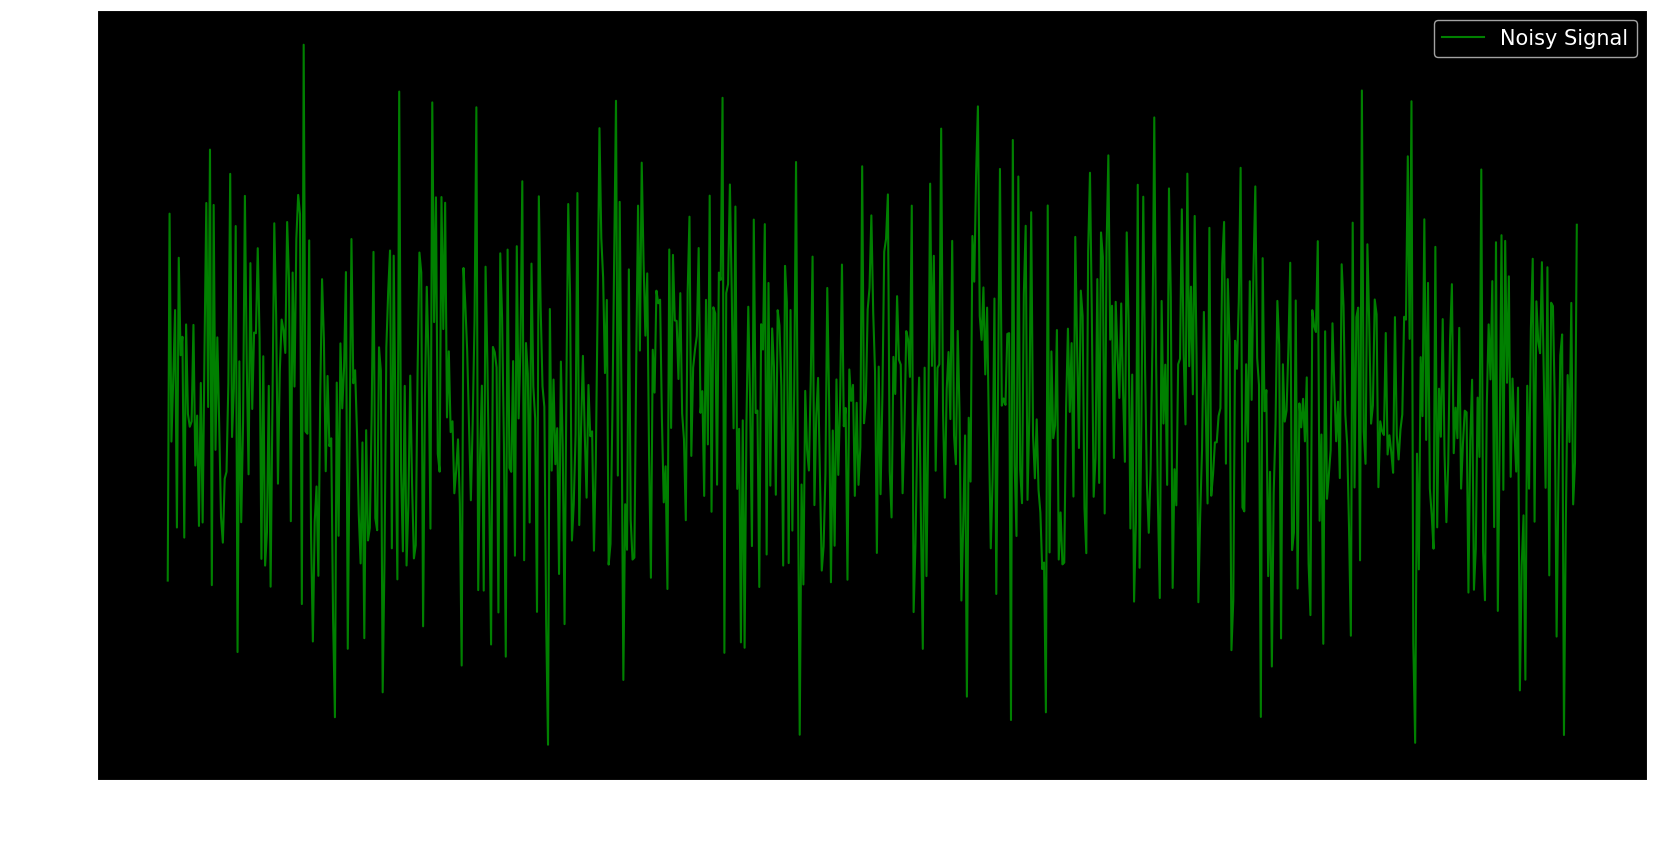

In [3]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Noisysignal,'g',label = 'Noisy Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [4]:
N = 30                # N = order of moving average  filetr. FilterWindow is actually (2N + 1). 
                      #Increasing the order of filter will increase the smoothness of filtered signal

In [5]:
Noisysignal.shape[0]

768

In [6]:
# Initialize denoised signal    
filt_sig = np.zeros(Noisysignal.shape[0])

In [7]:
# Applying moving average filter

for i in range(0,Noisysignal.shape[0]):
    filt_sig[i] = np.mean( Noisysignal[i:(2*N + 1) + i])
    #print(filt_sig[i])


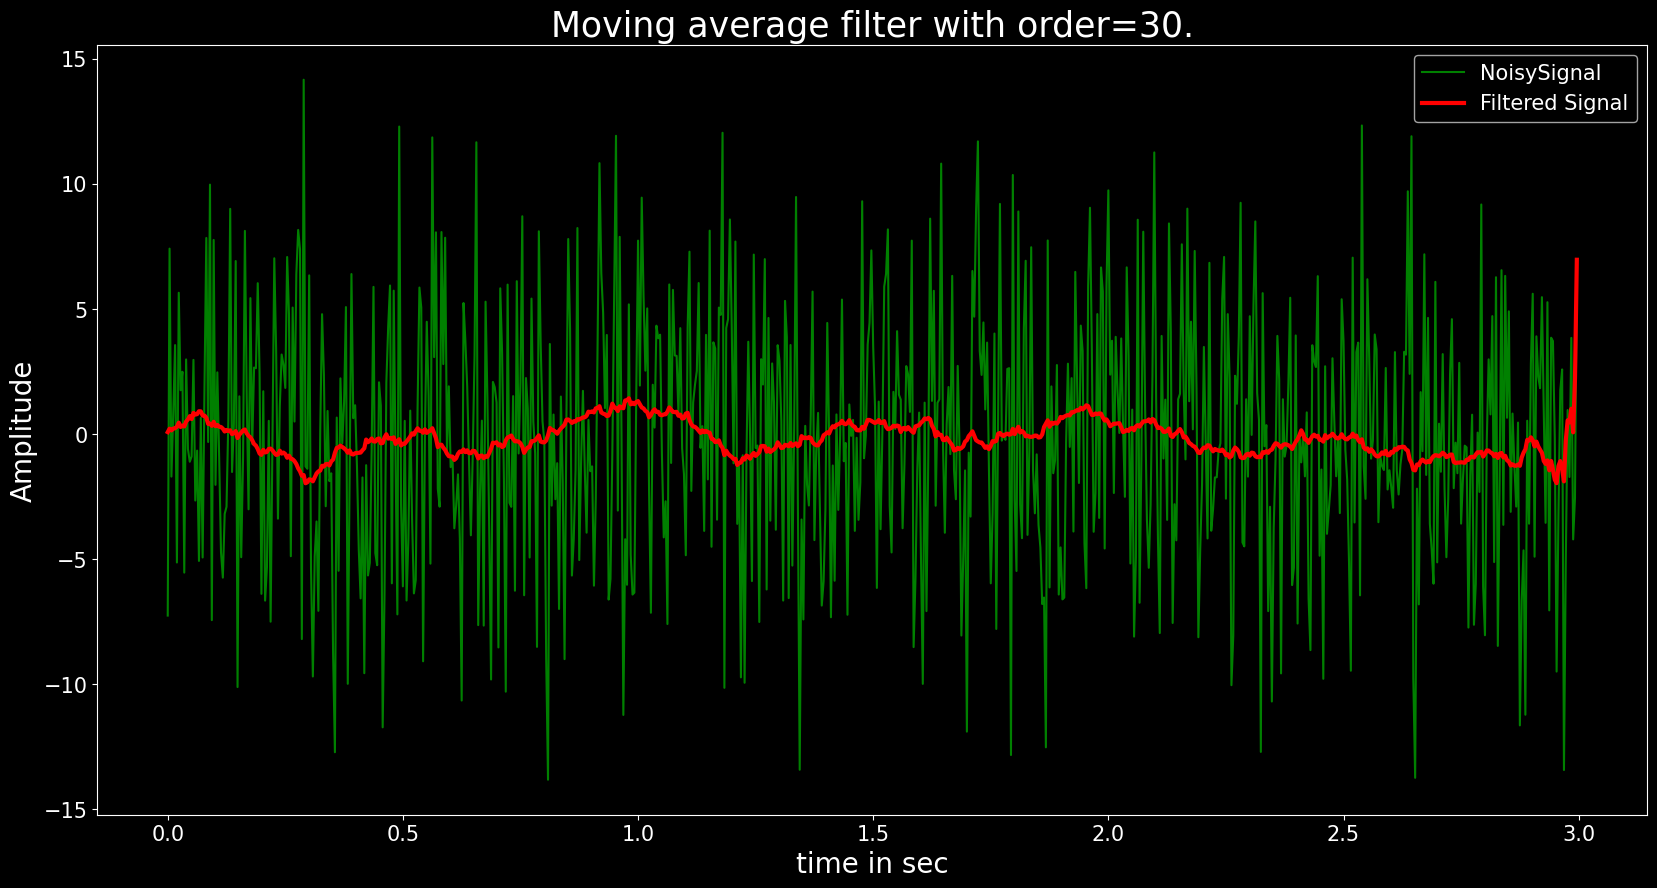

In [8]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Noisysignal,'g-',label = 'NoisySignal')
plt.plot(t,filt_sig,'r-',linewidth =3,label = 'Filtered Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Moving average filter with order=%d.' %N, fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

In [9]:
#Exercise 01: Choose N=15 and calculate the average moving filter. Plot the original signal and 
#the filtered signal

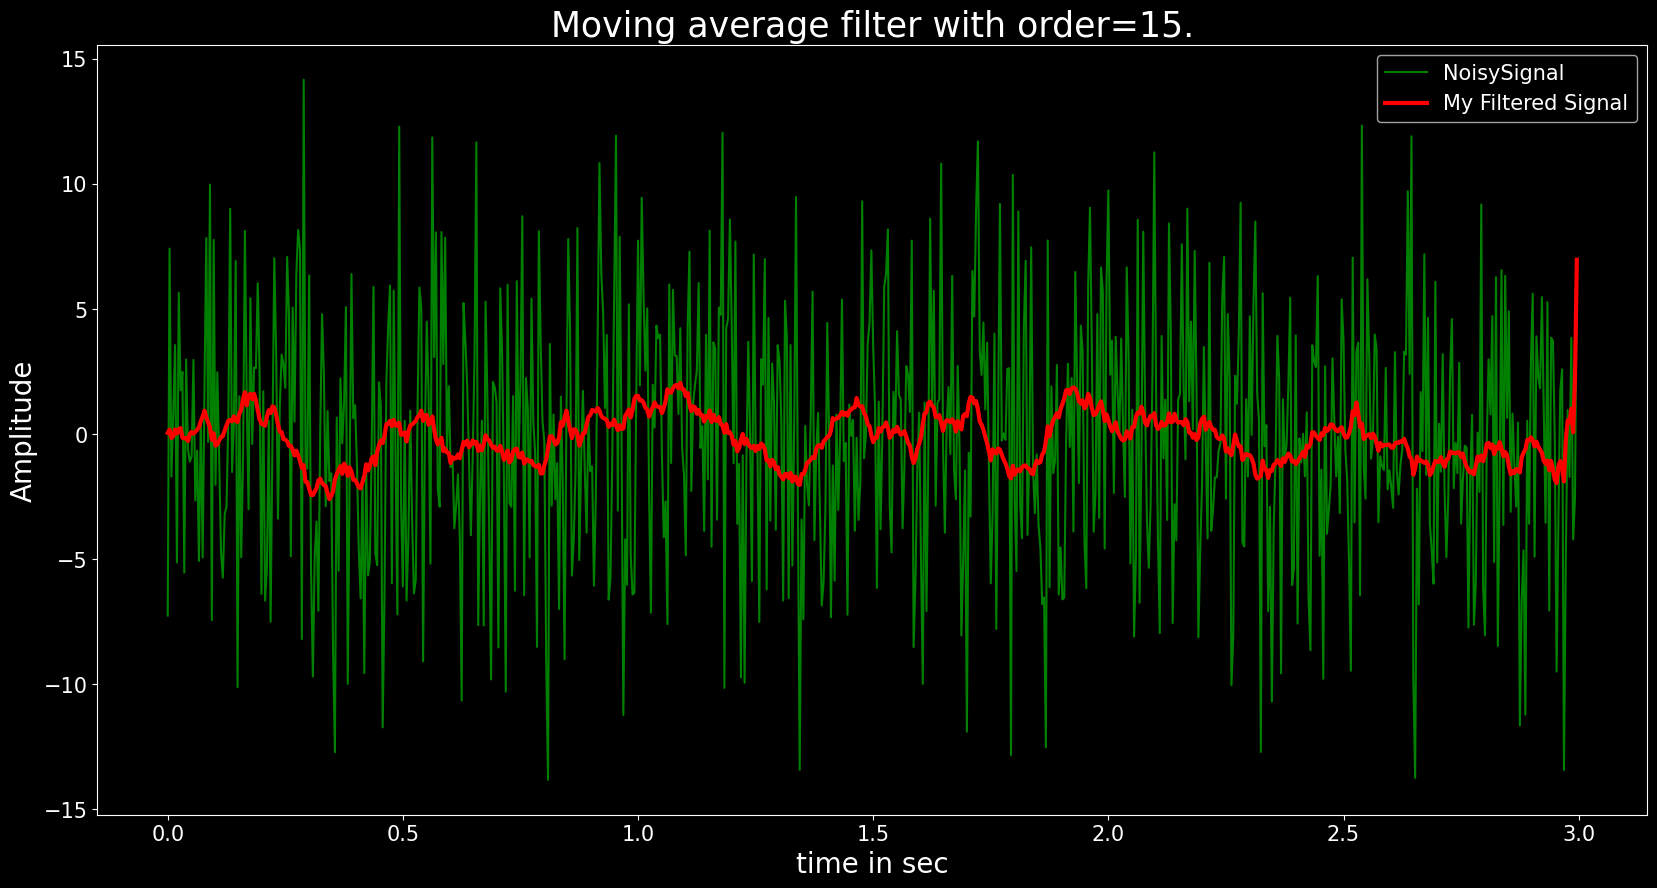

In [10]:
N1 = 15
# Applying moving average filter
filt_sig1 = np.zeros(Noisysignal.shape[0])

for i in range(0,Noisysignal.shape[0]):
    filt_sig1[i] = np.mean( Noisysignal[i:(2*N1 + 1) + i])
    #print(filt_sig[i])

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Noisysignal,'g-',label = 'NoisySignal')
plt.plot(t,filt_sig1,'r-',linewidth =3,label = 'My Filtered Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Moving average filter with order=%d.' %N1, fontsize = 25)
plt.legend(fontsize = 15)
plt.show()


In [11]:
#Exercise 02: Choose N=60 and calculate the average moving filter. Plot the original signal and 
#the filtered signal

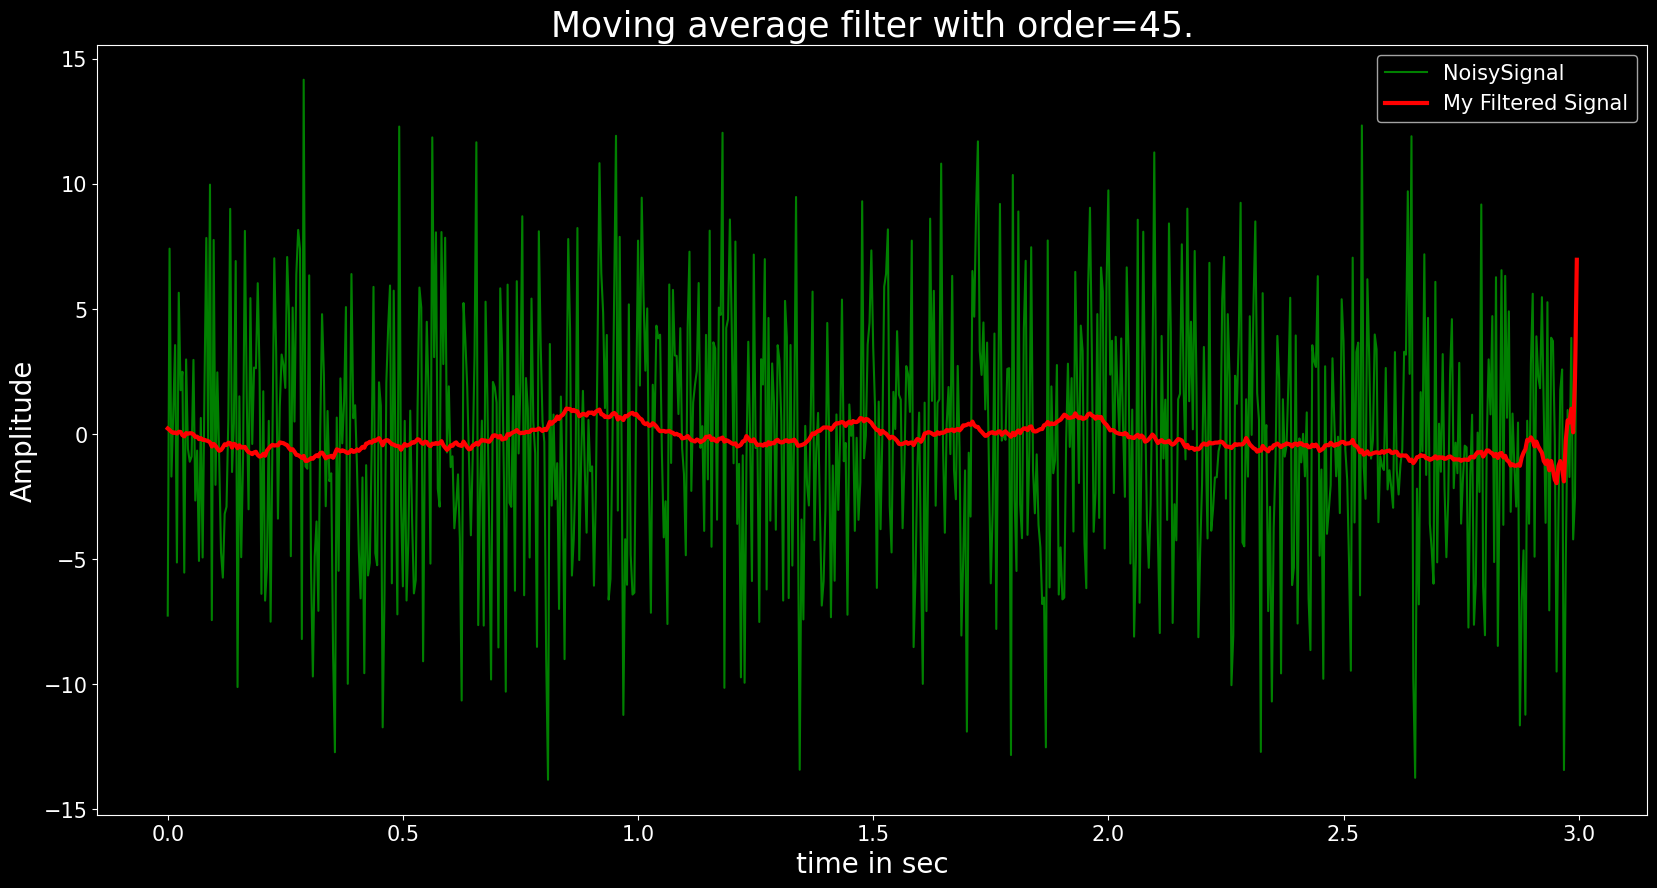

In [12]:
N2 = 45
# Applying moving average filter
filt_sig2 = np.zeros(Noisysignal.shape[0])

for i in range(0,Noisysignal.shape[0]):
    filt_sig2[i] = np.mean( Noisysignal[i:(2*N2 + 1) + i])
    #print(filt_sig[i])

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Noisysignal,'g-',label = 'NoisySignal')
plt.plot(t,filt_sig2,'r-',linewidth =3,label = 'My Filtered Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Moving average filter with order=%d.' %N2, fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

In [13]:
#Exercise 03: Graph the original signal and all three filter signals on the same graph

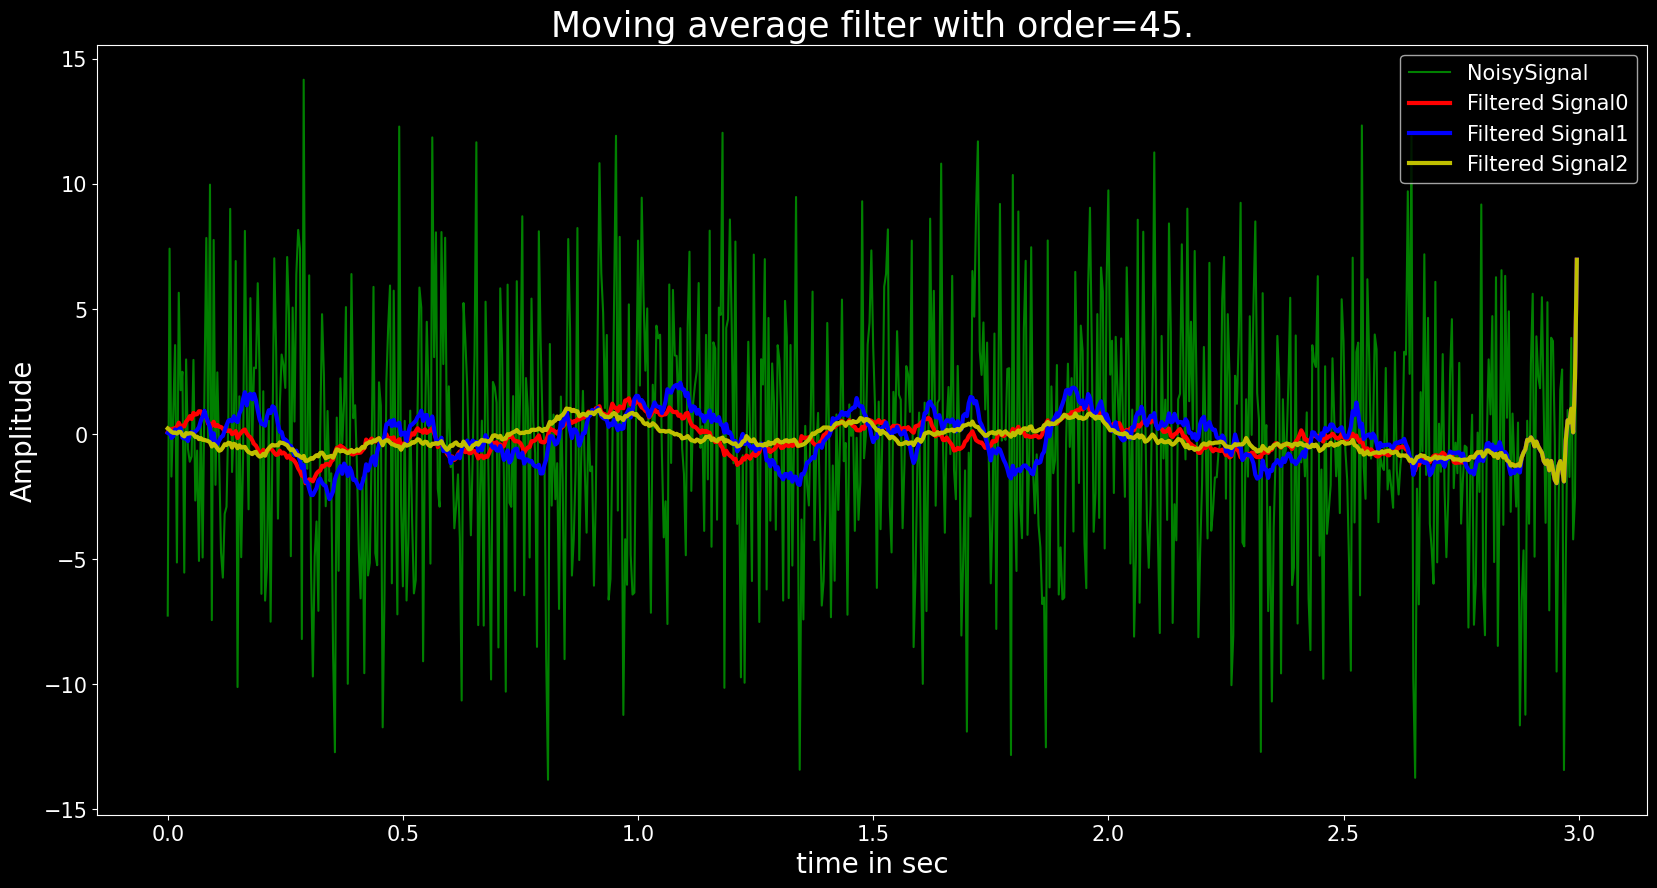

In [14]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Noisysignal,'g-',label = 'NoisySignal')
plt.plot(t,filt_sig,'r-',linewidth =3,label = 'Filtered Signal0')
plt.plot(t,filt_sig1,'b-',linewidth =3,label = 'Filtered Signal1')
plt.plot(t,filt_sig2,'y-',linewidth =3,label = 'Filtered Signal2')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Moving average filter with order=%d.' %N2, fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

# Signal denoising by Gaussian Mean Filter

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [16]:
# create signal
srate = 512 # Hz
t  = np.arange(0,3,1/srate)
pnts     = len(t)
print(pnts)
# creating a noiseless signal
x = np.sin(2*np.pi * 2 * t)

# creating a random noise
noise  = 5 * np.random.randn(pnts)

# Adding noise on signal
Noisysignal = x + noise

1536


In [17]:
print(pnts)

1536


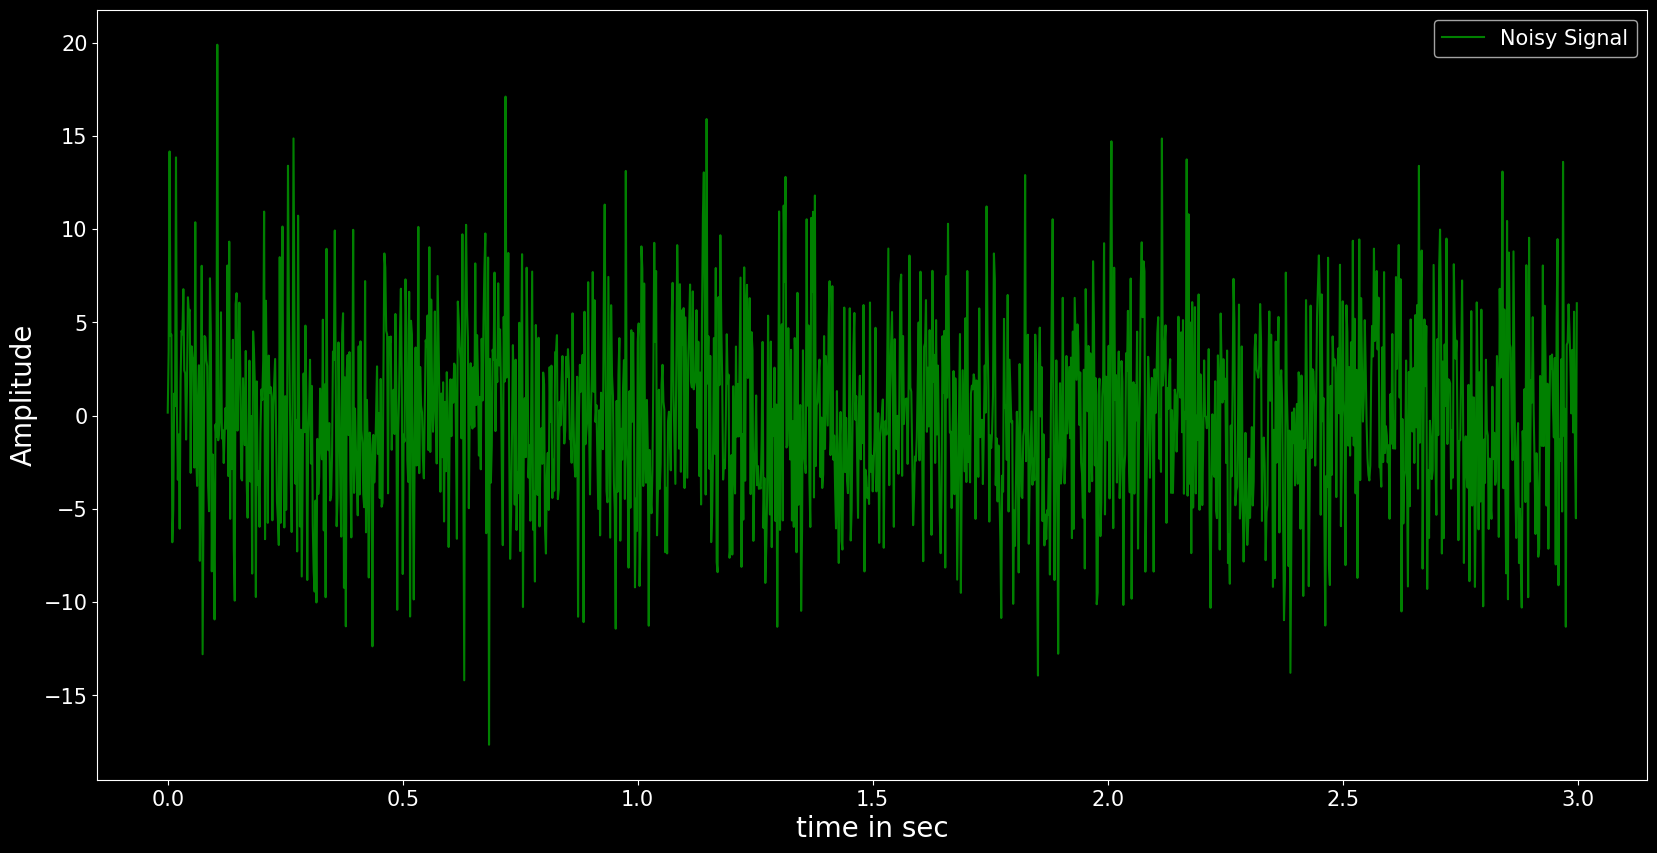

In [18]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Noisysignal,'g',label = 'Noisy Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

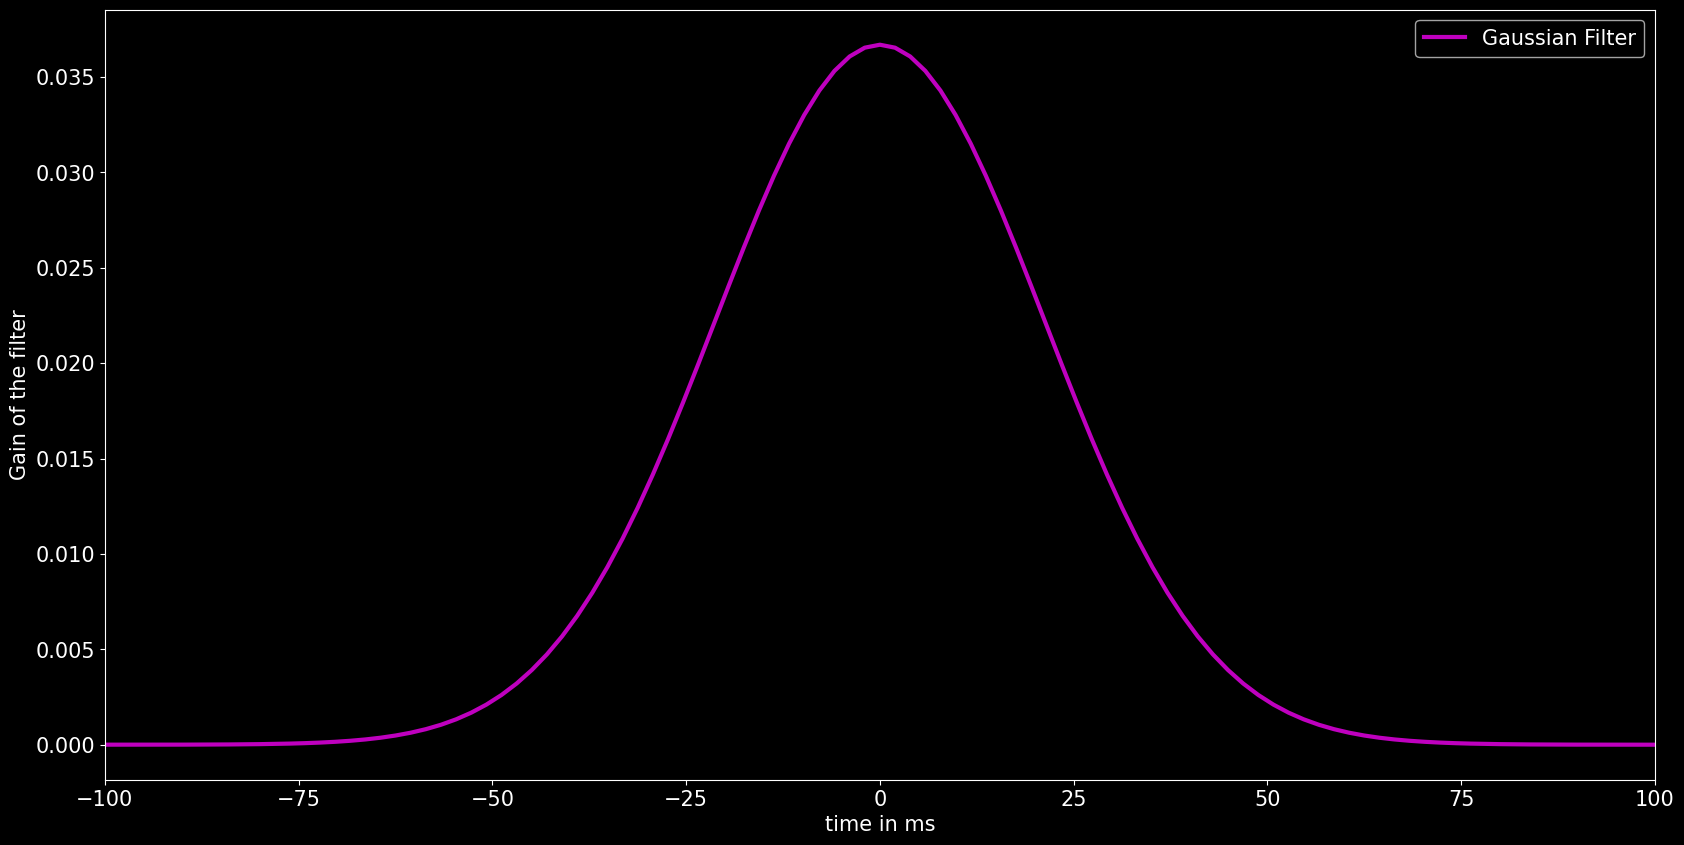

In [19]:
# Generating Gaussian filter / kernel

N = 100
fwhm = 50 # ms # full-width half-maximum
Gtime = 1000 * np.arange(-N,N)/srate # since fwhm is in ms, therefore we multiply it by 1000 to get Gtime in ms
#print(Gtime)
Gfilter = np.exp( -(4*np.log(2)*Gtime**2) / fwhm**2 ) # Generating Gaussian filter
Gfilter = Gfilter /np.sum(Gfilter) # Normalizing the Gaussian Filter


# plotting Gaussian filter / kernel

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Gtime,Gfilter,'m',linewidth =3,label = 'Gaussian Filter')
plt.xlabel('time in ms', fontsize = 15)
plt.ylabel('Gain of the filter', fontsize = 15)
plt.xlim([-100,100])
plt.legend(fontsize = 15)
plt.show()

In [20]:
#Exercise 1. Use a value for N=150 for the gaussian average filter and plot the kernel function.


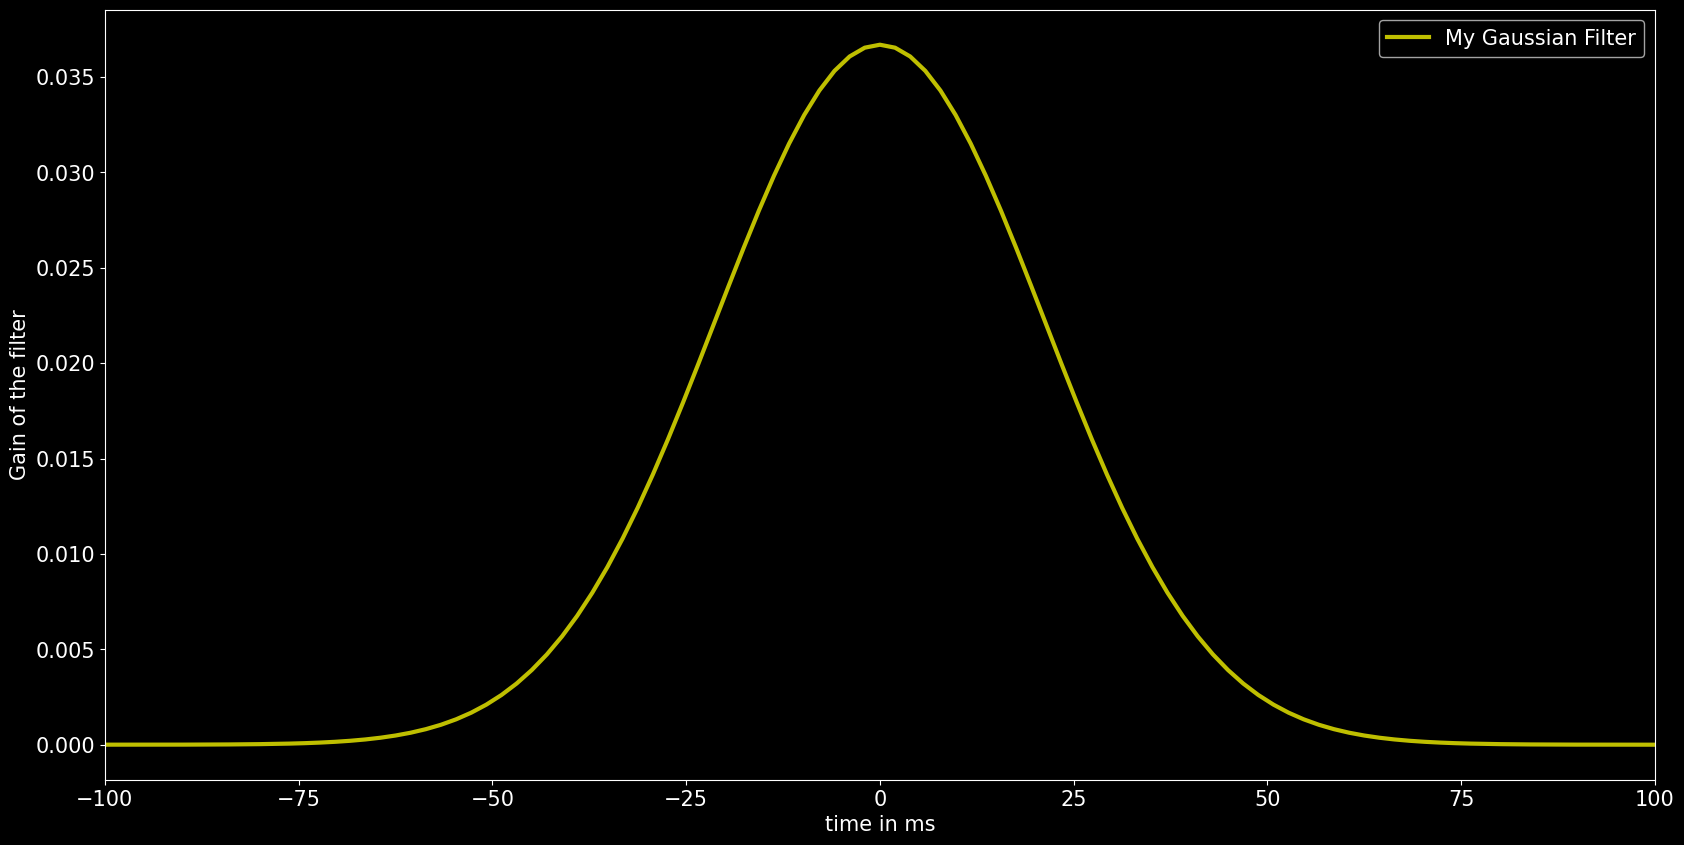

In [21]:
N1 = 150
fwhm1 = 50 # ms # full-width half-maximum
Gtime1 = 1000 * np.arange(-N1,N1)/srate # since fwhm is in ms, therefore we multiply it by 1000 to get Gtime in ms
#print(Gtime1)
Gfilter1 = np.exp( -(4*np.log(2)*Gtime1**2) / fwhm1**2 ) # Generating Gaussian filter
Gfilter1 = Gfilter1 /np.sum(Gfilter1) # Normalizing the Gaussian Filter
#print(Gfilter1)

# plotting Gaussian filter / kernel

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Gtime1,Gfilter1,'y',linewidth =3,label = 'My Gaussian Filter')
plt.xlabel('time in ms', fontsize = 15)
plt.ylabel('Gain of the filter', fontsize = 15)
plt.xlim([-100,100])
plt.legend(fontsize = 15)
plt.show()

### Zero padding the noisy siganl to avoid edge effect

In [22]:

sig_4_filter = np.concatenate ((np.zeros(N), Noisysignal, np.zeros(N)), axis= 0)  # zero padding to avoid edge effect

K = len(Noisysignal)
print(K)
#Re-defining the time array for the noisy signal
timeindex = np.concatenate ((np.arange(-N,0), np.arange(0,K) ,np.arange(K,K+N)), axis= 0)
time_4_filter = timeindex/srate #time step for the original signal

1536


In [23]:
print(len(sig_4_filter))
print(len(timeindex))

1736
1736


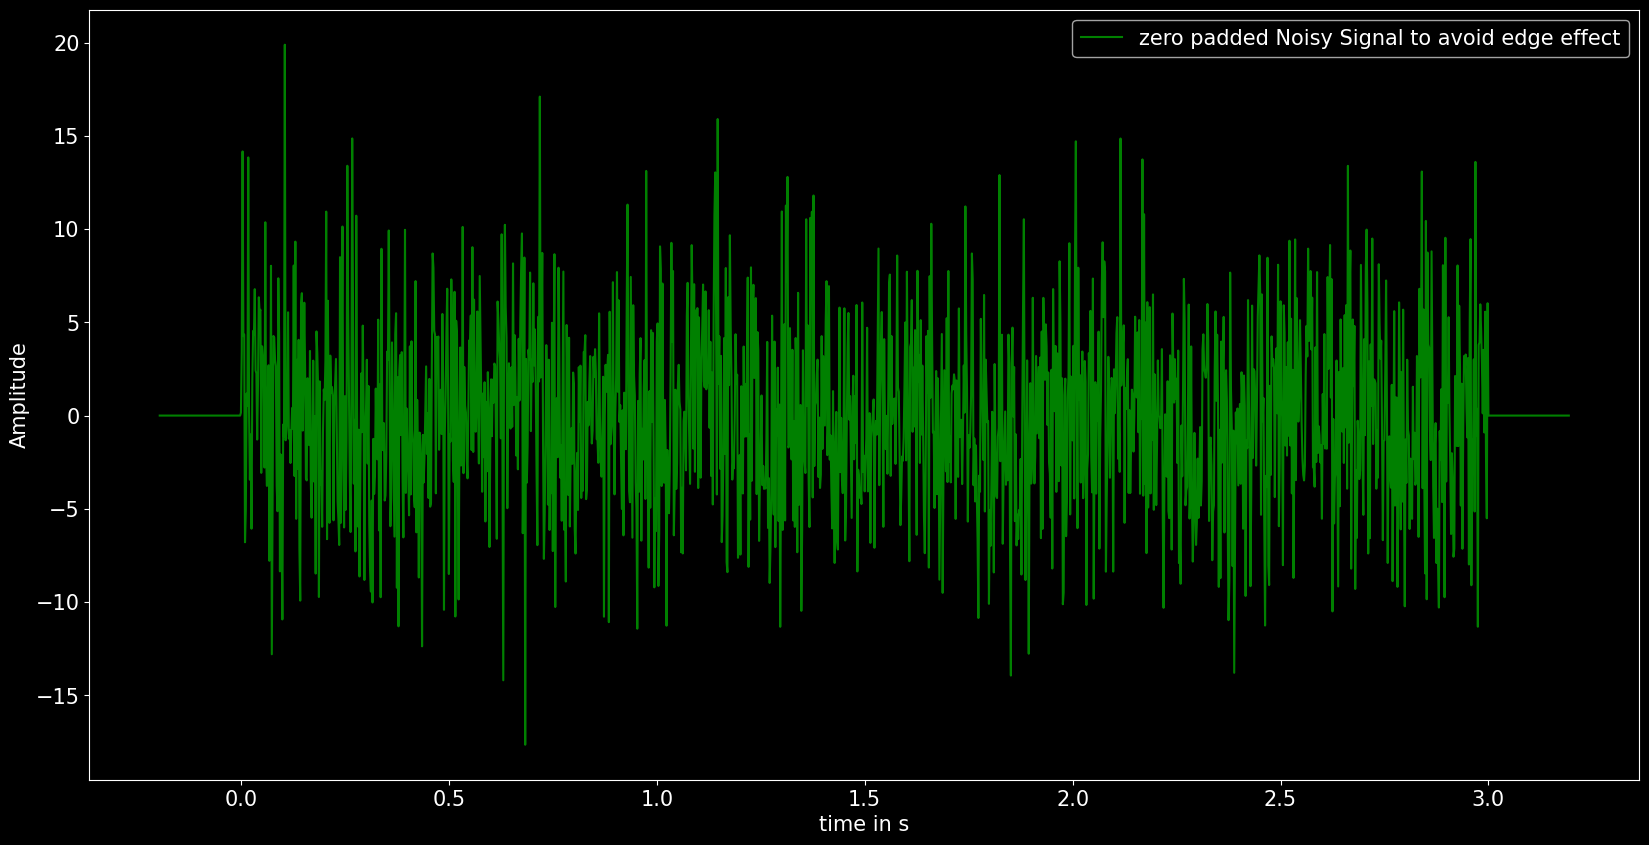

In [24]:
#printing the padded signal
plt.figure( figsize = (20,10))
plt.plot(time_4_filter,sig_4_filter,'g', label = 'zero padded Noisy Signal to avoid edge effect')
plt.xlabel('time in s', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.legend(fontsize = 15)

1836
1836


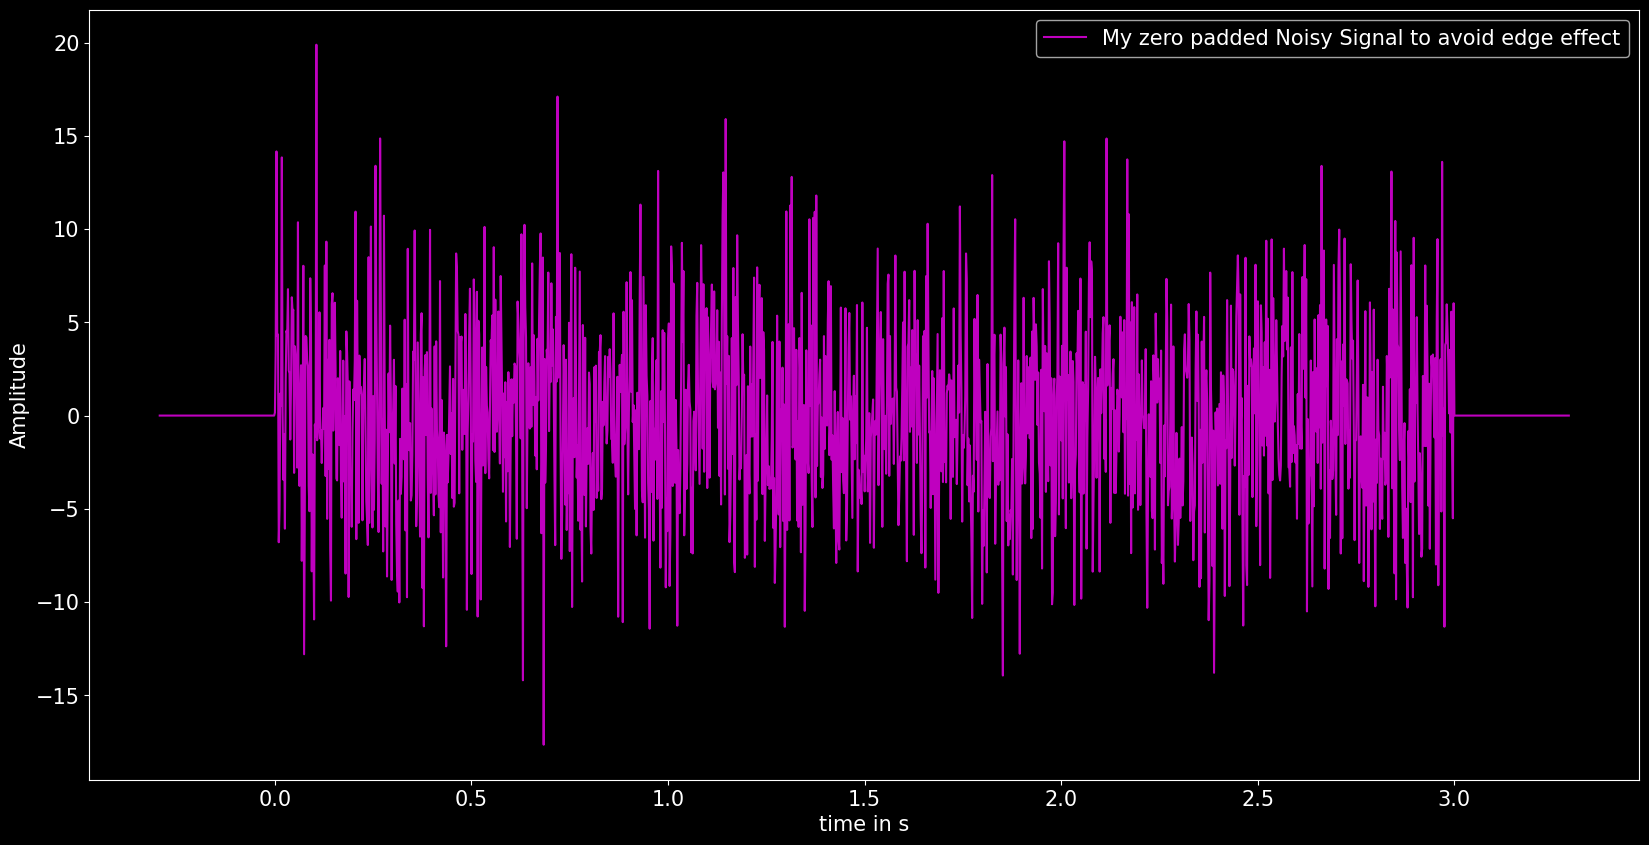

In [25]:
# Exercise 2. Add the zero padding to the signal according to the filtering kernel created
# in exercise 1. Check the lenght of the new signal and time and plot the padded signal with a 
# different color
sig_4_filter1 = np.concatenate ((np.zeros(N1), Noisysignal, np.zeros(N1)), axis= 0)  # zero padding to avoid edge effect

K = len(Noisysignal)
#print(K)
#Re-defining the time array for the noisy signal
timeindex1 = np.concatenate ((np.arange(-N1,0), np.arange(0,K) ,np.arange(K,K+N1)), axis= 0)
time_4_filter1 = timeindex1/srate #time step for the original signal

print(len(sig_4_filter1))
print(len(timeindex1))

#printing the padded signal
plt.figure( figsize = (20,10))
plt.plot(time_4_filter1,sig_4_filter1,'m', label = 'My zero padded Noisy Signal to avoid edge effect')
plt.xlabel('time in s', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.legend(fontsize = 15)

In [26]:
# Calculating the filtered signal.

# Initializing 
Gfilt_sig = np.zeros(sig_4_filter.shape[0])

# Applying Gaussian Filter
for i in range(0,Noisysignal.shape[0]):
    Gfilt_sig[i] = np.sum(sig_4_filter[i:2*N+i] * Gfilter)


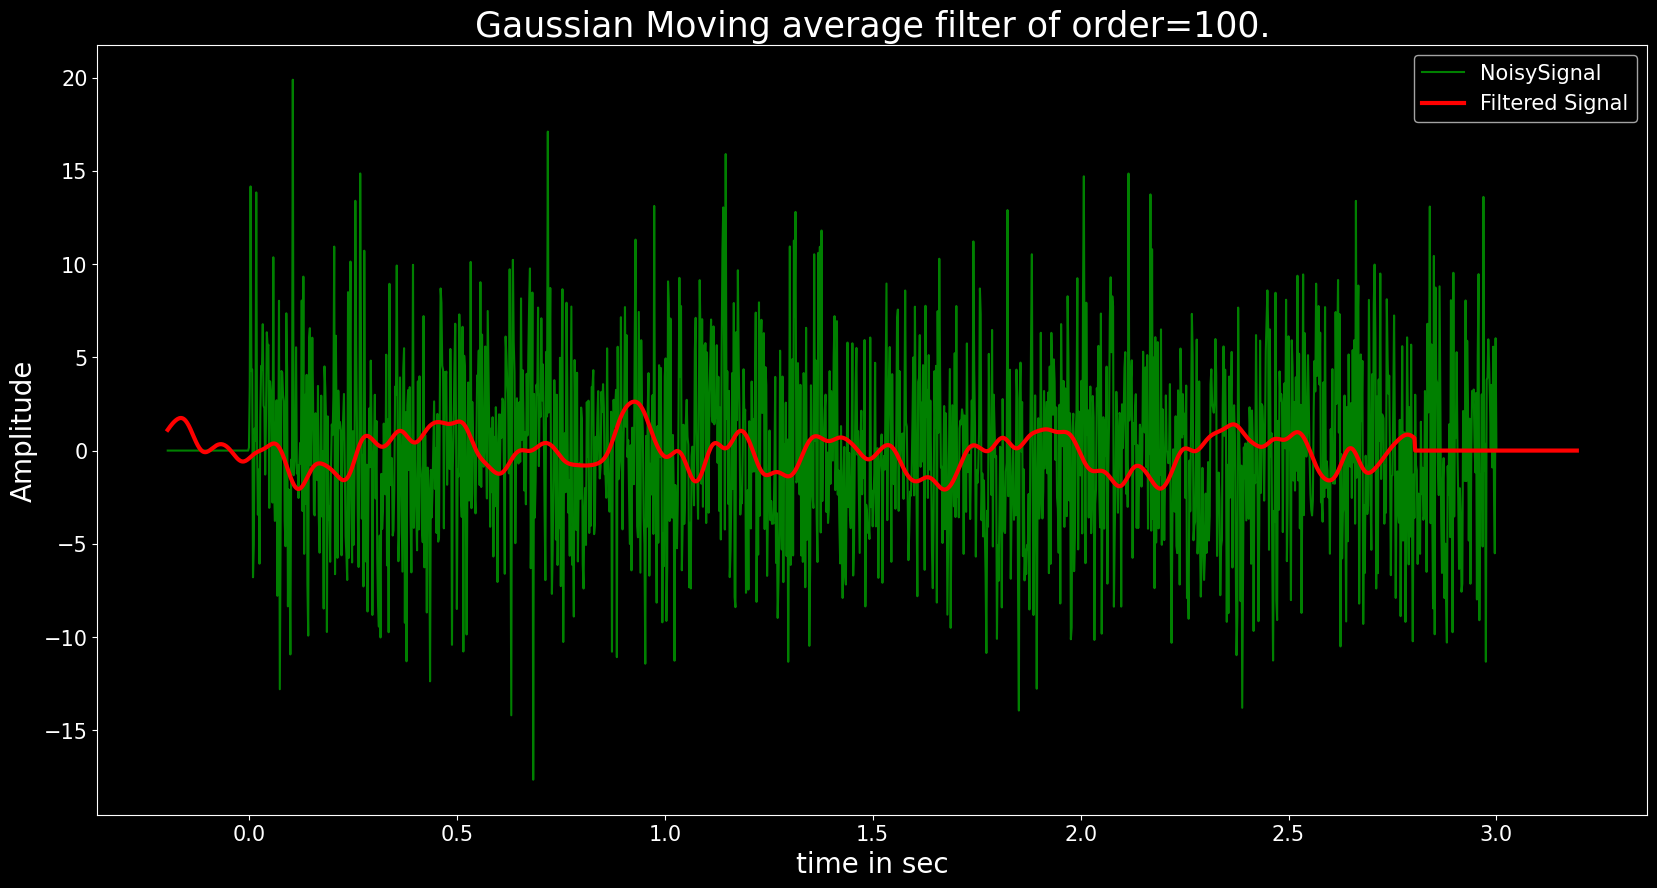

In [27]:
# Plotting the filtered signal
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(time_4_filter,sig_4_filter,'g-',label = 'NoisySignal')
plt.plot(time_4_filter,Gfilt_sig,'r-',linewidth = 3,label = 'Filtered Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Gaussian Moving average filter of order=%d.' %N, fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

In [28]:
# Exercise 3. Calculate the filtered signal using the gaussian filter and the padded signal that
# you created in Exercise 1 and 2.

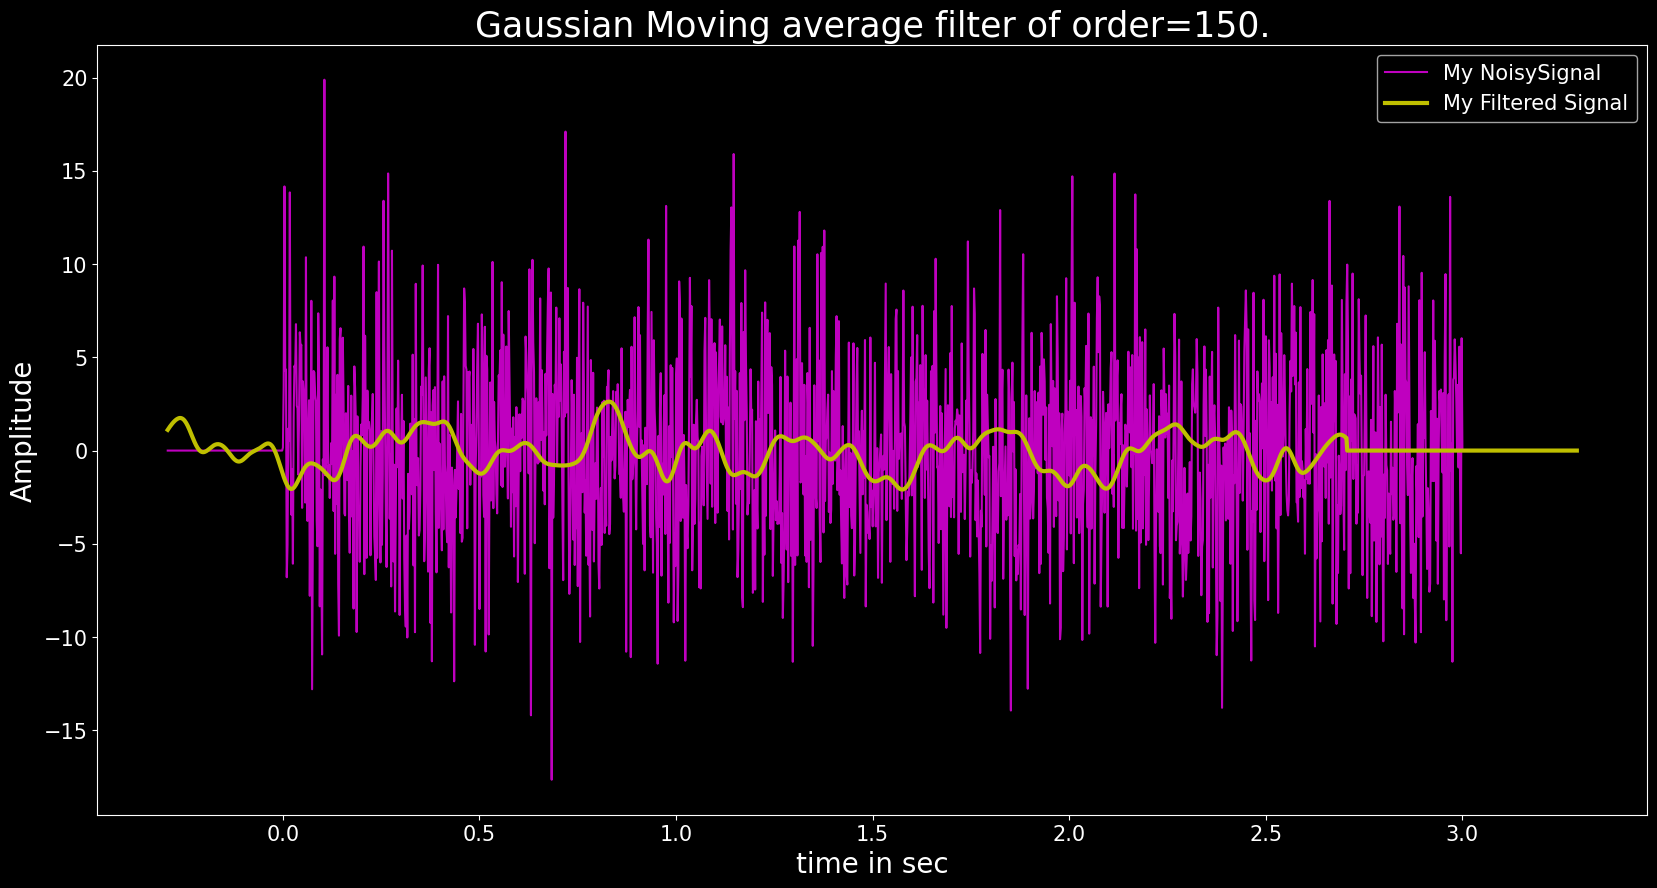

In [29]:
# Initializing 
Gfilt_sig1 = np.zeros(sig_4_filter1.shape[0])

# Applying Gaussian Filter
for i in range(0,Noisysignal.shape[0]):
    Gfilt_sig1[i] = np.sum(sig_4_filter1[i:2*N1+i] * Gfilter1)

# Plotting the filtered signal
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(time_4_filter1,sig_4_filter1,'m-',label = 'My NoisySignal')
plt.plot(time_4_filter1,Gfilt_sig1,'y-',linewidth = 3,label = 'My Filtered Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Gaussian Moving average filter of order=%d.' %N1, fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

In [30]:
Gfilt_sig_clipped = Gfilt_sig[0:K] # clip off the edges to avoid edge effect.

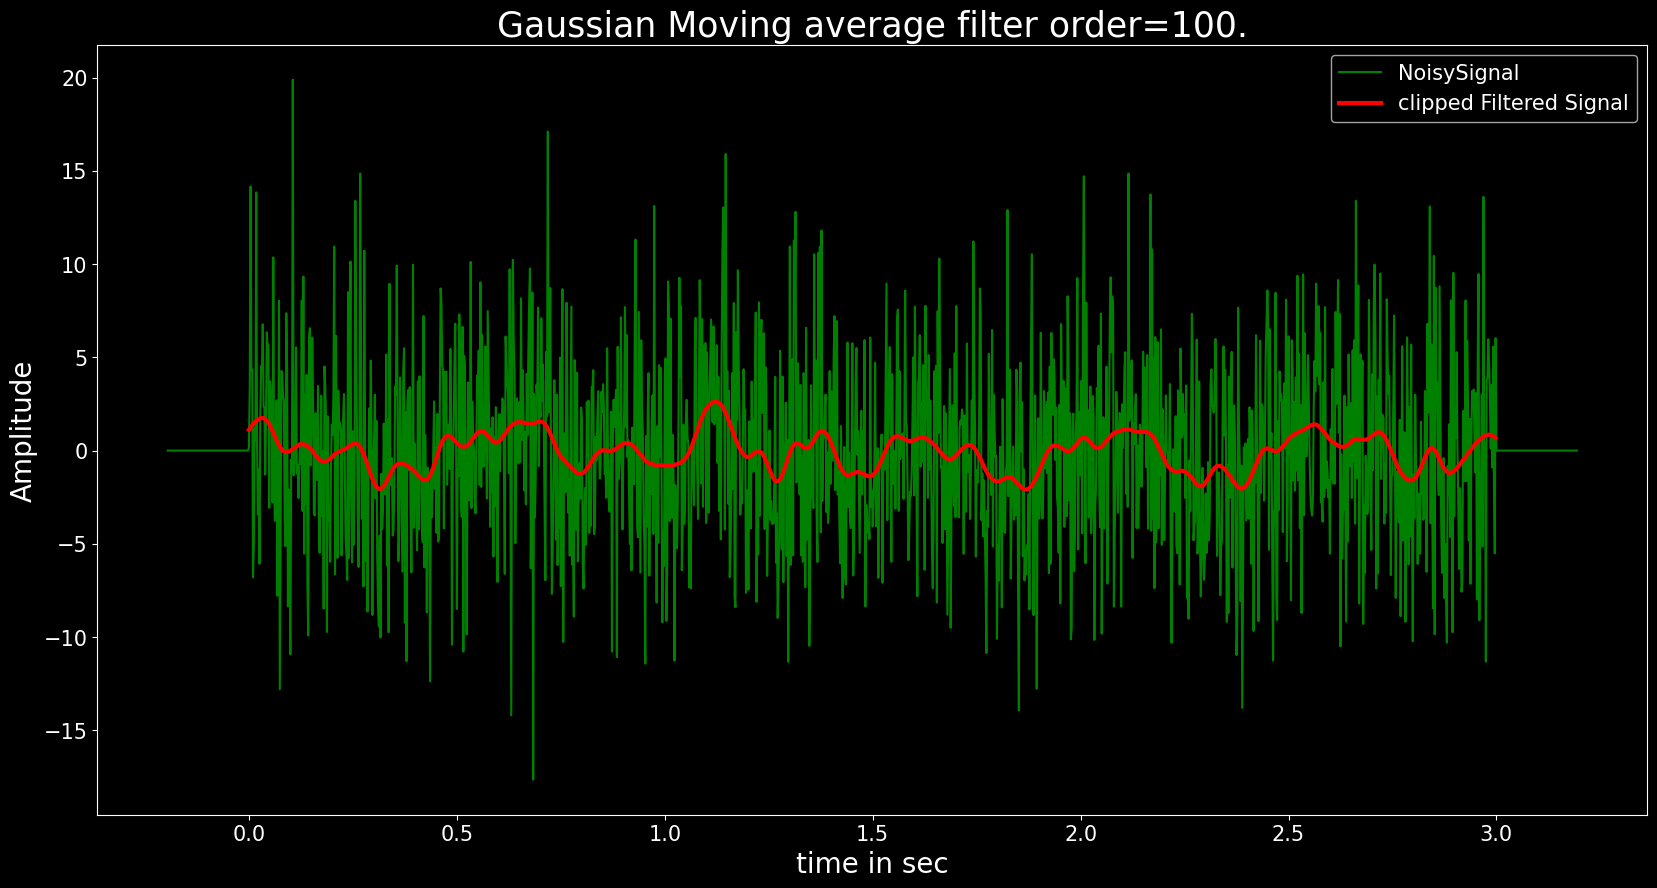

In [31]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(time_4_filter,sig_4_filter,'g-',label = 'NoisySignal')
plt.plot(t,Gfilt_sig_clipped,'r-',linewidth = 3,label = 'clipped Filtered Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Gaussian Moving average filter order=%d.' %N, fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

In [32]:
# Exercise 4. Clip the edges to avoid the edge affect in your signal created on Exercise 3 
# and graph it.


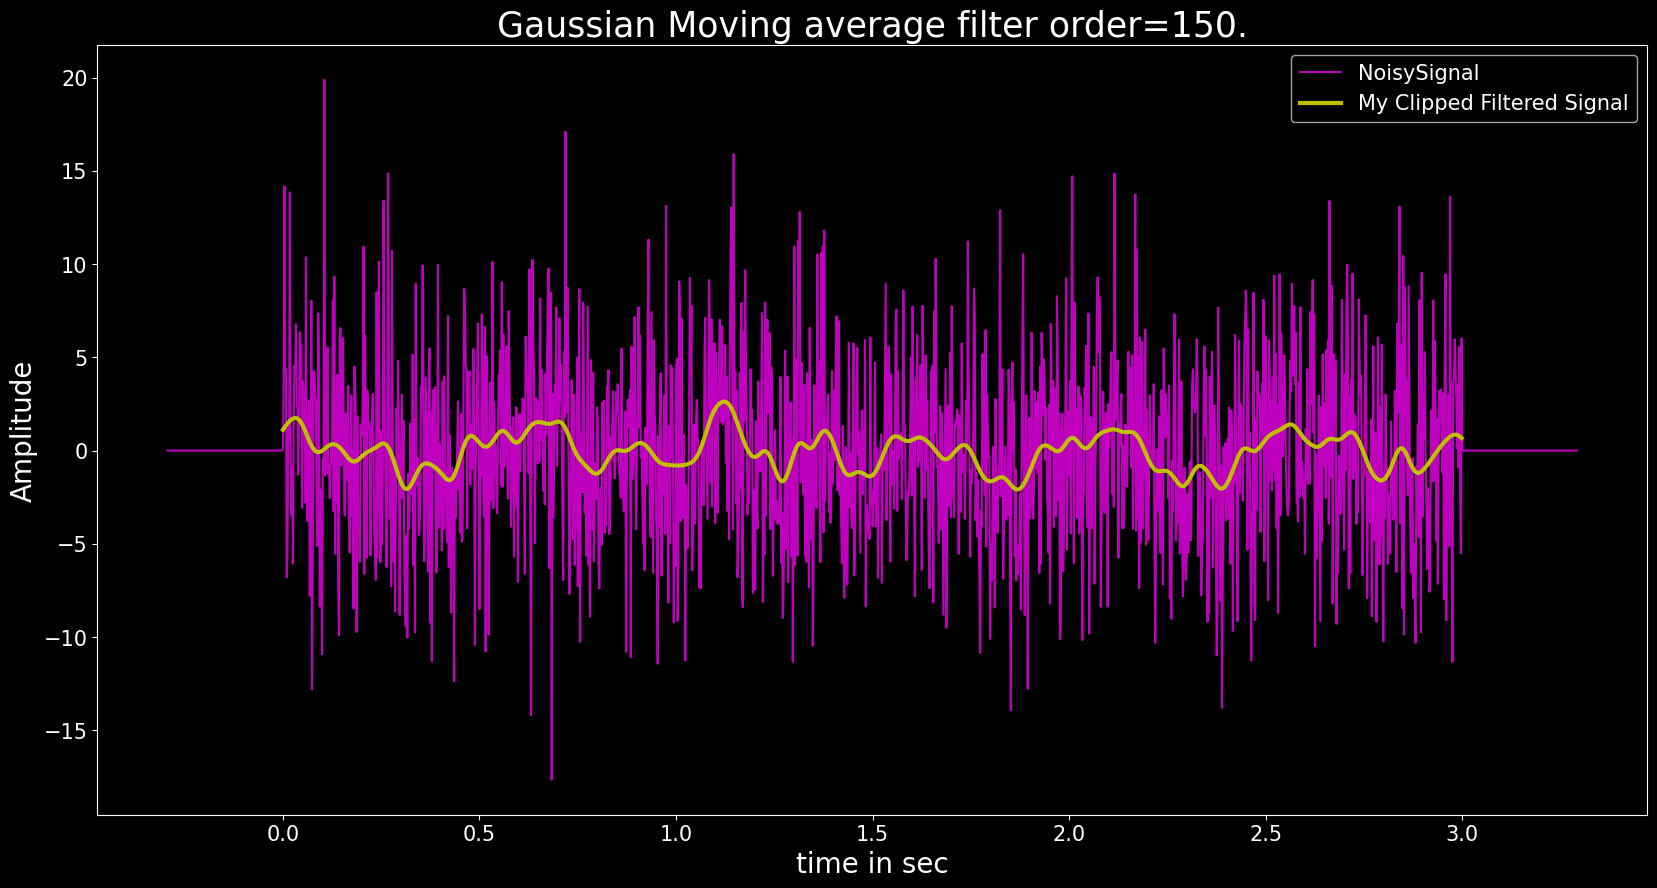

In [33]:
Gfilt_sig_clipped1 = Gfilt_sig1[0:K] # clip off the edges to avoid edge effect.

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(time_4_filter1,sig_4_filter1,'m-',label = 'NoisySignal')
plt.plot(t,Gfilt_sig_clipped1,'y-',linewidth = 3,label = 'My Clipped Filtered Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Gaussian Moving average filter order=%d.' %N1, fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

In [34]:
# Exercise 5. Graph the noisy signal and both filtered signals on the same graph

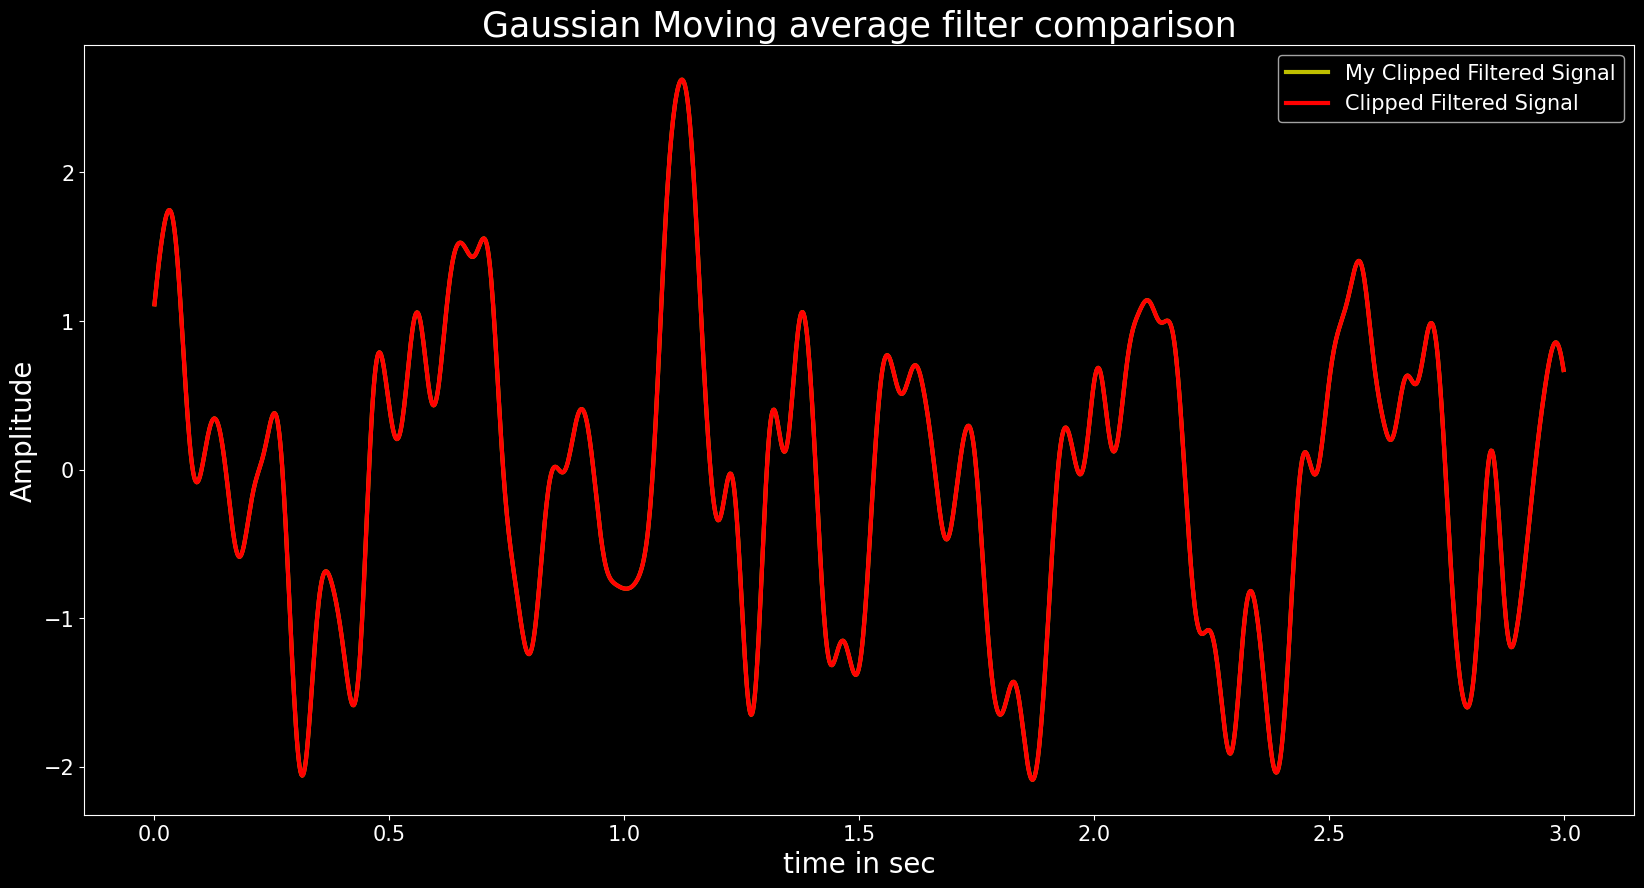

In [35]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(time_4_filter1,sig_4_filter1,'m-',label = 'NoisySignal')
plt.plot(t,Gfilt_sig_clipped1,'y-',linewidth = 3,label = 'My Clipped Filtered Signal')
plt.plot(t,Gfilt_sig_clipped,'r-',linewidth = 3,label = 'Clipped Filtered Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Gaussian Moving average filter comparison', fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

# Signal denoising by Median Filter

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [37]:
# create signal
srate = 256 # Hz
t  = np.arange(0,3,1/srate)
pnts     = len(t)

# creating a noiseless signal
x = np.sin(2*np.pi * 2 * t)

# creating a random noise
noise  = 5 * np.random.randn(pnts)

# Adding noise on signal
signal = x + noise

print(pnts)

768


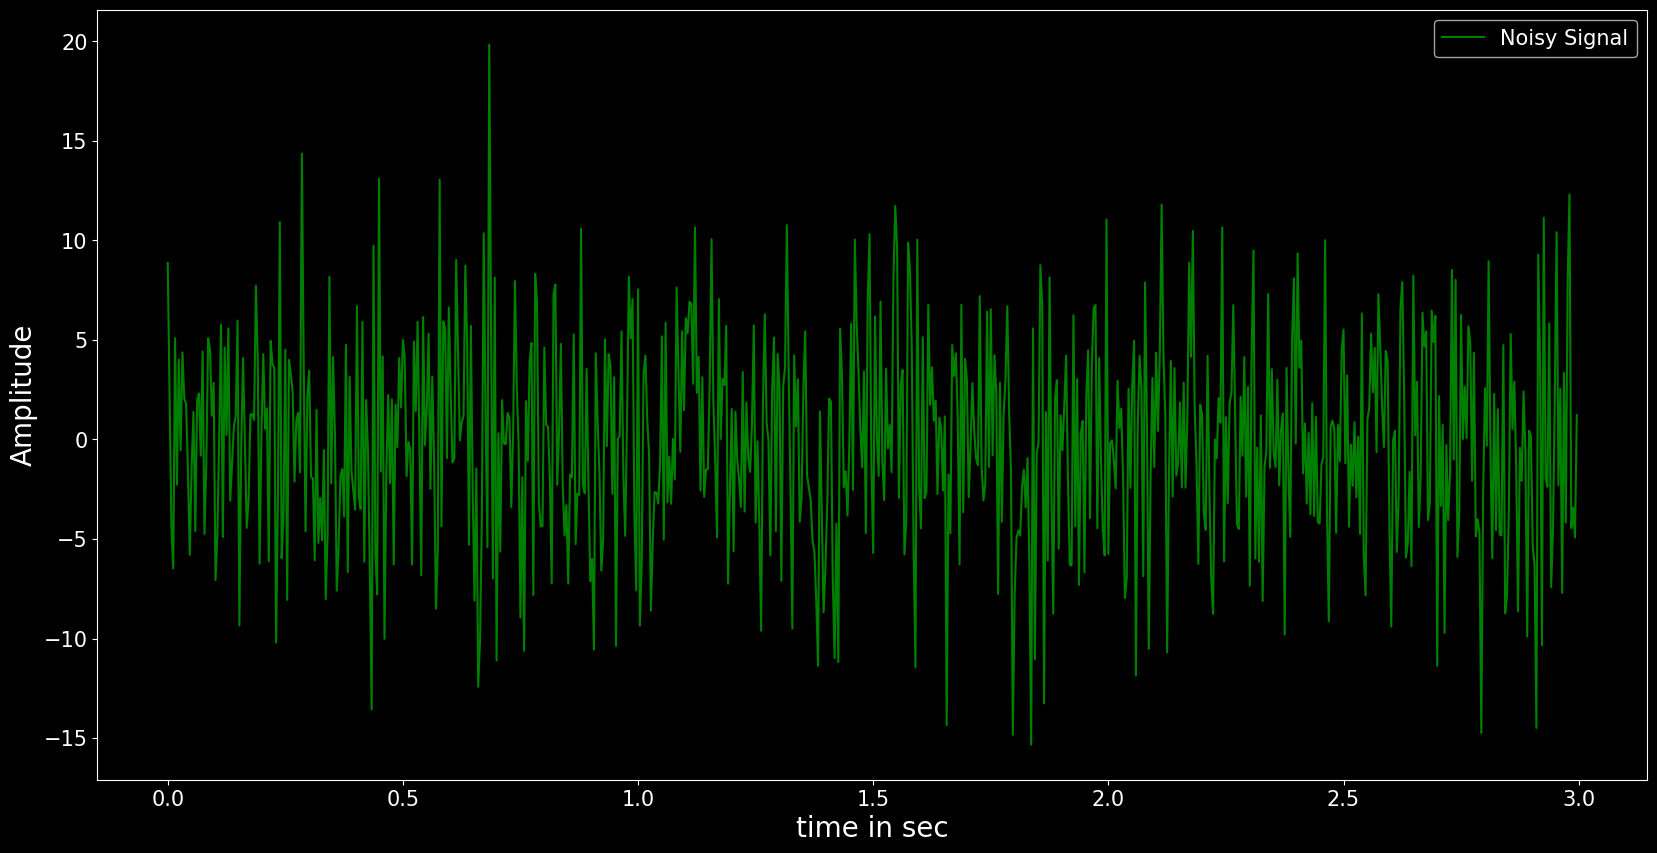

In [38]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,signal,'g',label = 'Noisy Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [39]:
N = 50             

# Initialize denoised signal    
filt_sig = np.zeros(signal.shape[0])

In [40]:
# Applying Median filter

for i in range(0,signal.shape[0]):
    filt_sig[i] = np.median(signal[i:N+i])
    

In [41]:
# Applying moving average filter
mean_filt_sig = np.zeros(signal.shape[0])
for i in range(0,signal.shape[0]):
    mean_filt_sig[i] = np.mean(signal[i:N+i])

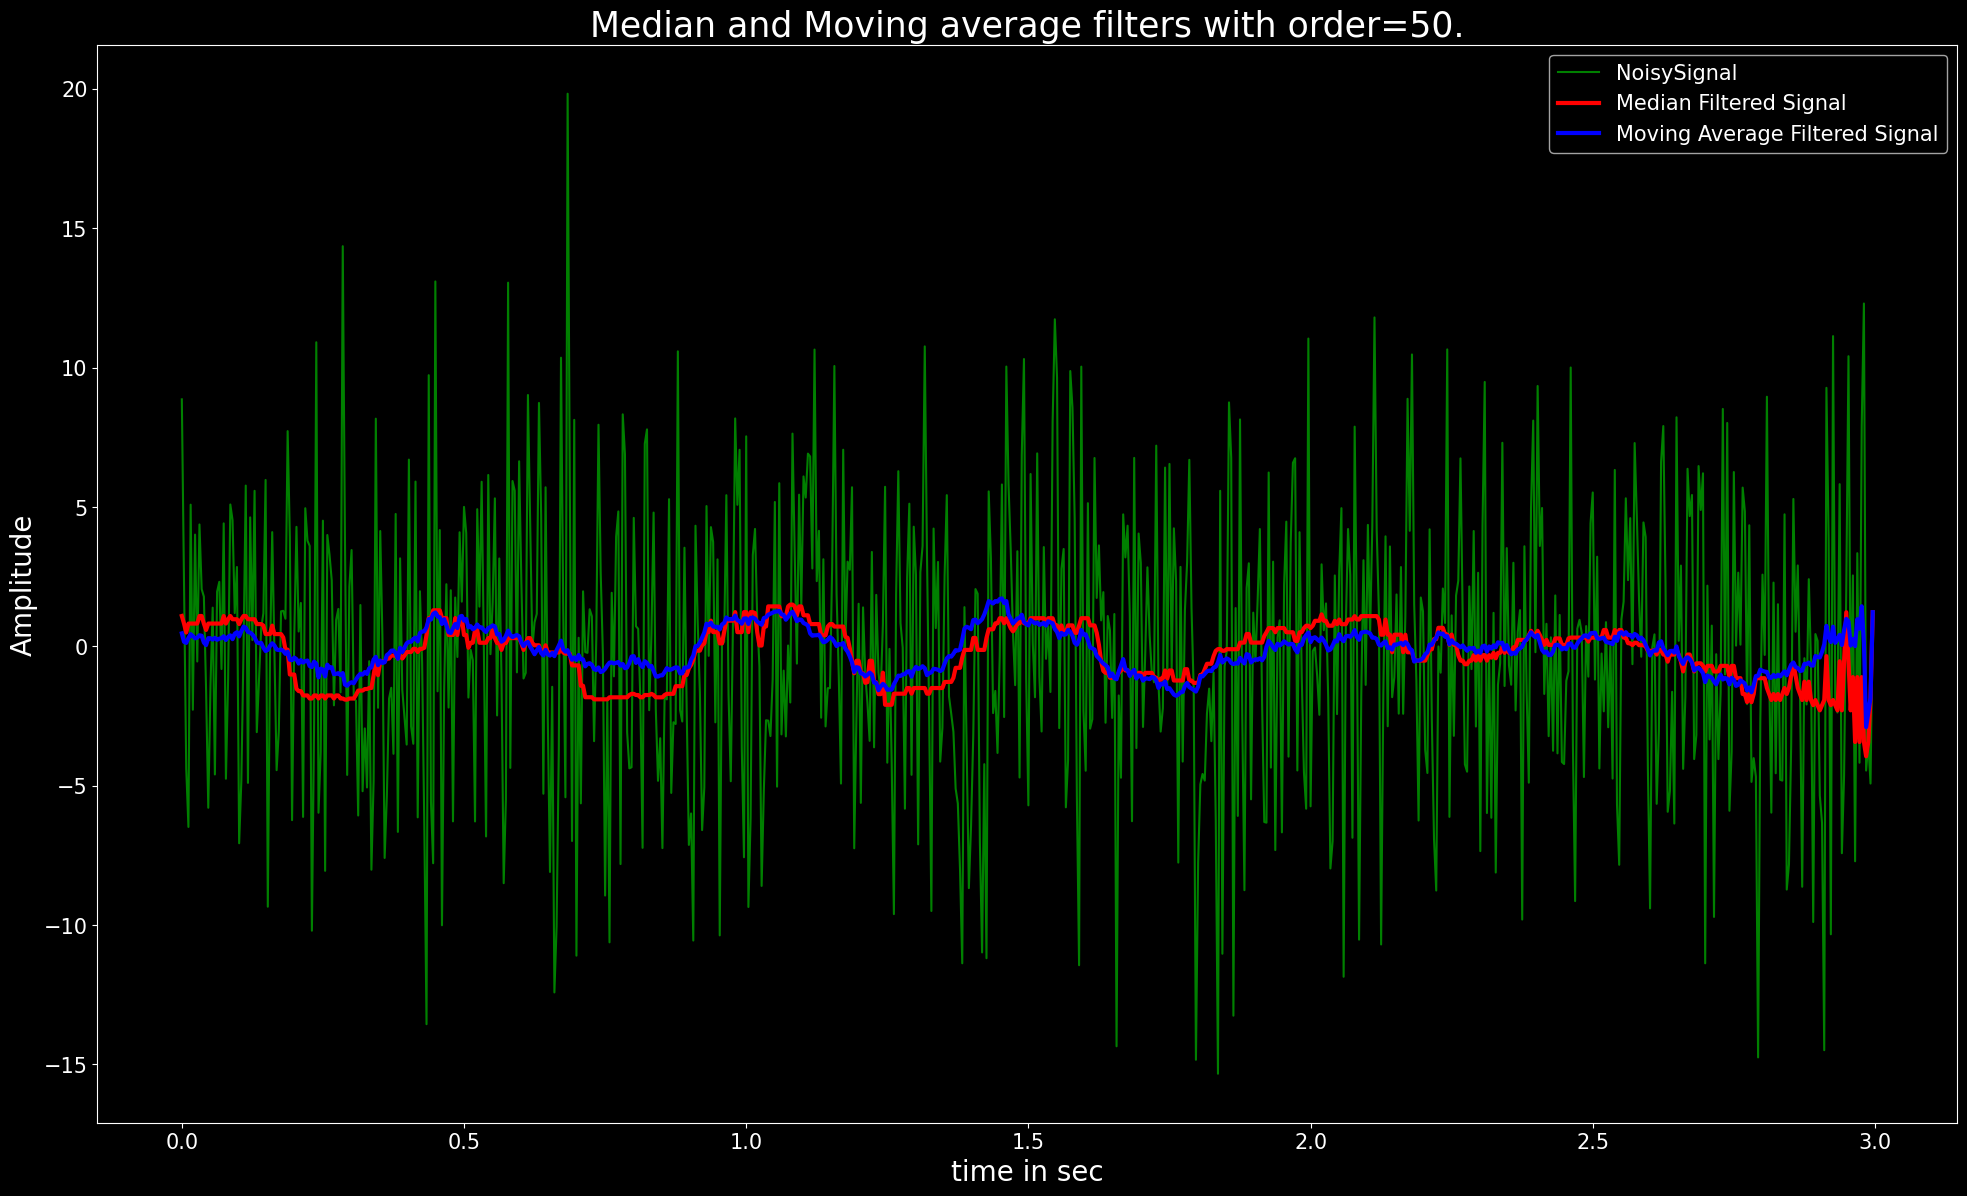

In [42]:
plt.figure(figsize = (24,14)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,signal,'g-',label = 'NoisySignal')
plt.plot(t,filt_sig,'r-',linewidth =3,label = 'Median Filtered Signal')
plt.plot(t,mean_filt_sig,'b-',linewidth = 3,label = 'Moving Average Filtered Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Median and Moving average filters with order=%d.' %N, fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

# Recovering signal from noisy spikes by MedianFilter

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

In [44]:
signal = pd.read_csv('Spike.csv')

In [45]:
signal.head(10)

-1.41E+00
0     -4.190
1     -2.240
2     -0.472
3     -2.490
4      0.784
5     -0.856
6     -1.380
7      0.595
8     -1.440
9     -2.470

In [46]:
signal = np.array(signal)

In [47]:
spiky = abs(signal)

In [48]:
len(spiky)

4999

In [49]:
spiky.shape

(4999, 1)

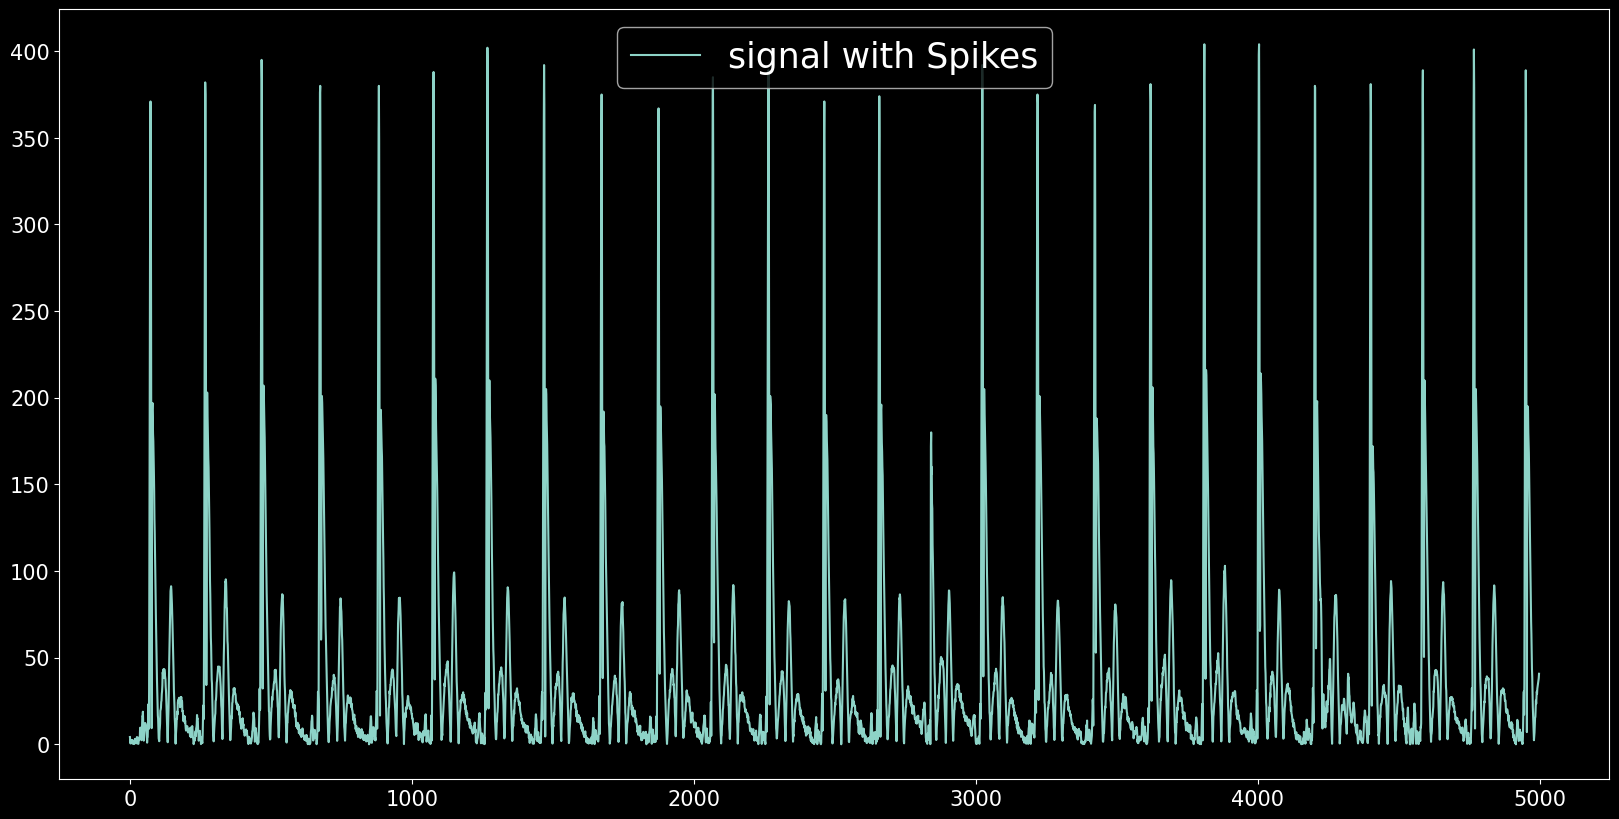

In [50]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(spiky, label = 'signal with Spikes')
plt.legend(fontsize = 25)
plt.show()

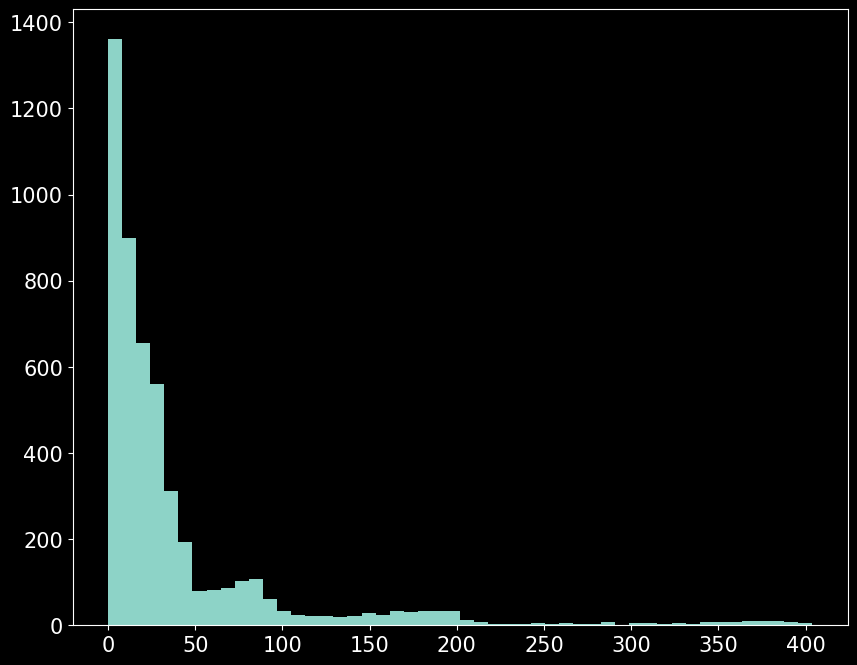

In [51]:
# use hist to pick threshold

plt.figure(figsize = (10,8))
plt.hist(spiky,50)
plt.show()

In [52]:
threshold = 50

### How to use np.where for 1D and 2D array (Practicing np.where)

In [53]:
# For 1D array

a = np.array([1,2,3,4,5,16,27,38,99,110])
print(a)
print(a.shape)
b= np.where(a>5)
print(b)

[  1   2   3   4   5  16  27  38  99 110]
(10,)
(array([5, 6, 7, 8, 9]),)


In [54]:
a[9]

110

In [55]:
# For 2D array

aa = np.array([1,2,3,4,5,16,27,38,99,110]).reshape(-1,1)
print(aa)
print(aa.shape)
bb= np.where(aa>5)
print(bb)

[[  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [ 16]
 [ 27]
 [ 38]
 [ 99]
 [110]]
(10, 1)
(array([5, 6, 7, 8, 9]), array([0, 0, 0, 0, 0]))


In [56]:
len(bb)

2

In [57]:
aa = np.array([1,2,3,4,5,16,27,38,99,110]).reshape(-1,1)
print(aa)
print(aa.shape)
bb= np.where(aa>5)[0]
print(bb)

[[  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [ 16]
 [ 27]
 [ 38]
 [ 99]
 [110]]
(10, 1)
[5 6 7 8 9]


### Using np.where to find the indices of spiky signal having magnitude greater than 50

In [58]:
threshold = 50

# find signal values above the threshold value
ultra_thresh = np.where(spiky > threshold)[0]


In [59]:
ultra_thresh

array([  69,   70,   71,   72,   73,   74,   75,   76,   78,   79,   80,
         81,   82,   83,   84,   85,   86,   87,   88,   89,   90,   91,
         92,   93,   94,  140,  141,  142,  143,  144,  145,  146,  147,
        148,  149,  150,  151,  152,  153,  263,  264,  265,  266,  267,
        268,  269,  270,  272,  273,  274,  275,  276,  277,  278,  279,
        280,  281,  282,  283,  284,  285,  286,  287,  288,  333,  334,
        335,  336,  337,  338,  339,  340,  341,  342,  343,  344,  345,
        346,  347,  463,  464,  465,  466,  467,  468,  469,  470,  472,
        473,  474,  475,  476,  477,  478,  479,  480,  481,  482,  483,
        484,  485,  486,  487,  488,  489,  534,  535,  536,  537,  538,
        539,  540,  541,  542,  543,  544,  545,  546,  547,  670,  671,
        672,  673,  674,  675,  676,  677,  678,  679,  680,  681,  682,
        683,  684,  685,  686,  687,  688,  689,  690,  691,  692,  693,
        694,  695,  696,  742,  743,  744,  745,  7

In [60]:
len(ultra_thresh)

998

In [61]:
filtsig = np.copy(spiky)

N = 100

# Applying Median Filter

for ii in range(0,ultra_thresh.shape[0]):
    filtsig[ultra_thresh[ii]] = np.median(spiky[ultra_thresh[ii]:ultra_thresh[ii]+N])

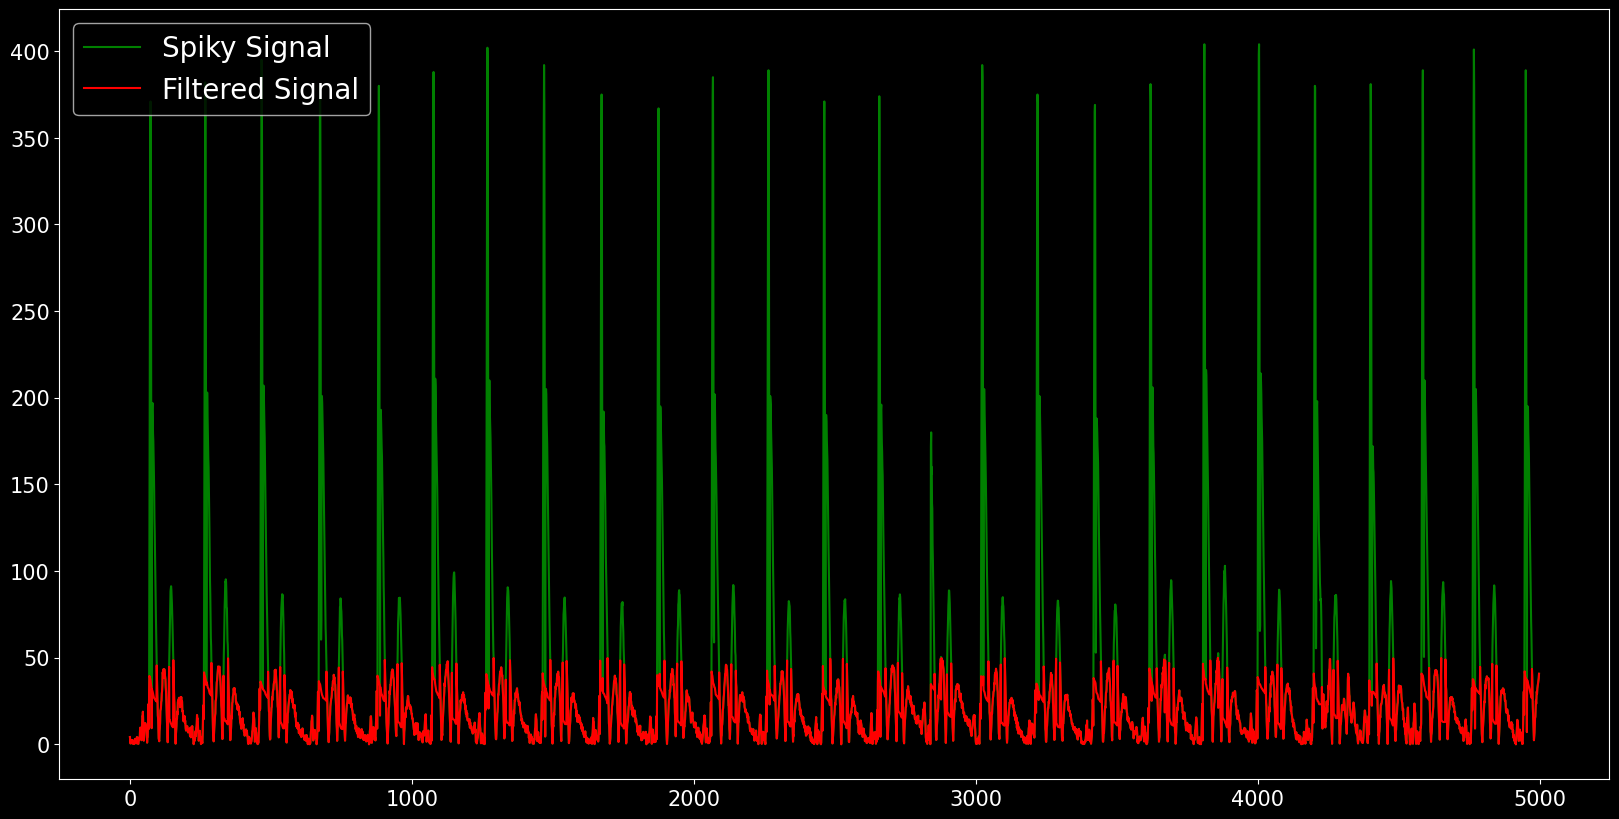

In [62]:
plt.figure(figsize =(20,10))
plt.plot(spiky,'g', label = 'Spiky Signal')
plt.plot(filtsig,'r', label = 'Filtered Signal')
plt.legend(fontsize = 20)
plt.show()